# 📈 Inflation Analysis – Virginia
**Objective**: Analyze Consumer Price Index (CPI) data from the BLS for key categories in Virginia using Python.
We calculate 12-month YoY inflation, smooth trends with rolling averages, and prepare the data for Tableau.

## 🔧 Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 📥 Step 1: Load Cleaned CPI Data

In [2]:
def load_data(filepath):
    df = pd.read_csv(filepath, parse_dates=['Date'])
    return df

## 📉 Step 2: Calculate Year-over-Year % Change

In [3]:
def calculate_yoy_change(df):
    df = df.copy()
    df['YoY_Change'] = df.groupby('Category')['CPI'].pct_change(periods=12) * 100
    return df

## 🔁 Step 3: Add Rolling Averages (3-Month, 6-Month)

In [4]:
def add_rolling_averages(df, windows=[3, 6]):
    for window in windows:
        df[f'RollingAvg_{window}'] = df.groupby('Category')['CPI'].transform(lambda x: x.rolling(window).mean())
    return df

## 📊 Step 4: Plot CPI Trend with Rolling Averages

In [5]:
def plot_rolling_trend(df, category):
    df_cat = df[df['Category'] == category]
    plt.figure(figsize=(12, 6))
    plt.plot(df_cat['Date'], df_cat['CPI'], label='CPI', alpha=0.5, linewidth=2)
    plt.plot(df_cat['Date'], df_cat['RollingAvg_3'], label='3-Month Rolling Avg', linestyle='--')
    plt.plot(df_cat['Date'], df_cat['RollingAvg_6'], label='6-Month Rolling Avg', linestyle='-.')
    plt.title(f'CPI Trend for {category} in Virginia (with Rolling Averages)')
    plt.xlabel('Date')
    plt.ylabel('CPI Index')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 🚀 Step 5: Run the Pipeline

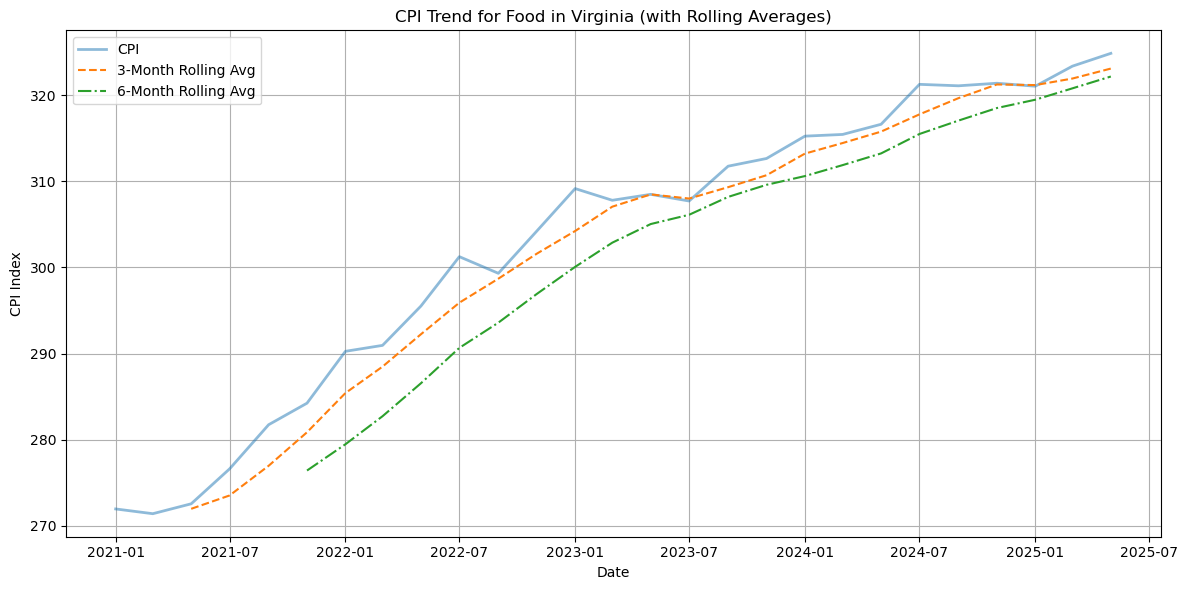

✅ Saved: virginia_cpi_with_trends.csv


In [6]:
# Update with your actual file path
file_path = 'virginia_cpi_tableau_ready.csv'

df = load_data(file_path)
df = calculate_yoy_change(df)
df = add_rolling_averages(df)

# Plot one example category (change this to explore others)
plot_rolling_trend(df, 'Food')

# Save the final DataFrame for Tableau
df.to_csv('virginia_cpi_with_trends2.csv', index=False)
print("✅ Saved: virginia_cpi_with_trends.csv")